In [1]:
import pandas


In [4]:
pandas.read_csv?


In [6]:
titanic = pandas.read_csv("https://raw.githubusercontent.com/manaranjanp/Python_DS_2days/master/data/titanic.csv")

In [11]:
titanic.head(5)

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male


In [ ]:
titanic.survived

# How many people is survived ?

In [10]:
titanic.survived.value_counts()

0    864
1    449
Name: survived, dtype: int64

# People of what age were on board titanic ship ?

In [12]:
import matplotlib.pyplot as plt

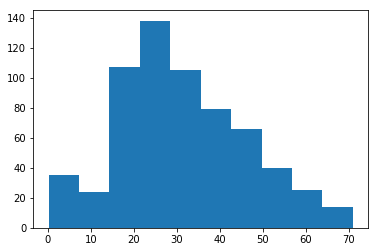

In [17]:
plt.hist(titanic.age);

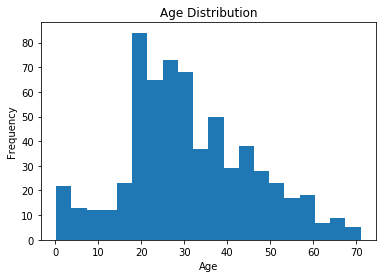

In [23]:
plt.hist(titanic.age, bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.savefig('age.png');

### Survived vs Sex

In [33]:
pandas.crosstab(titanic.survived, titanic.sex)

sex,female,male
survived,,
0,156,708
1,307,142


In [35]:
pandas.crosstab(titanic.survived, titanic.sex, margins = True)

sex,female,male,All
survived,,,
0,156,708,864
1,307,142,449
All,463,850,1313


### How many children were on board

In [38]:
children_df = titanic[titanic.age < 10]

In [40]:
children_df.shape

(46, 11)

In [41]:
titanic.shape

(1313, 11)

### Survived vs Class

In [45]:
pandas.crosstab(titanic.survived, titanic.pclass, normalize = 'index')

pclass,1st,2nd,3rd
survived,,,
0,0.149306,0.186343,0.664352
1,0.429844,0.265033,0.305122


#### From each class what percentage is servived.

In [46]:
pandas.crosstab(titanic.survived, titanic.pclass, normalize = 'columns')

pclass,1st,2nd,3rd
survived,,,
0,0.400621,0.575,0.807314
1,0.599379,0.425,0.192686


### Average age of eac class

In [49]:
titanic.groupby('pclass')['age'].mean()

pclass
1st    39.667773
2nd    28.300314
3rd    24.519658
Name: age, dtype: float64

### Which age passgengers died most

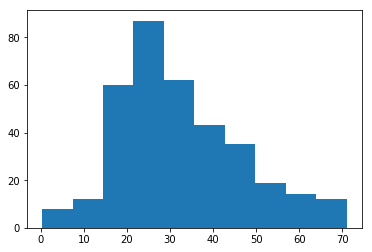

In [53]:
plt.hist(titanic[titanic.survived == 0].age, bins=10);

## Using map

In [54]:
titanic['gender'] = titanic['sex'].map(lambda x: int(x=='male'))

In [56]:
titanic.sample(5)

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex,gender
220,221,1st,1,"Ryerson, Miss Emily Borie",18.0,Cherbourg,"Haverford, PA / Cooperstown, NY",NaN,17608 L262 7s 6d,4,female,0
818,819,3rd,1,"Glynn, Miss Mary Agatha",NaN,Queenstown,"Co Clare, Ireland Washington, DC",NaN,NaN,13,female,0
102,103,1st,1,"Fortune, Miss Mabel",23.0,Southampton,"Winnipeg, MB",NaN,NaN,10,female,0
133,134,1st,1,"Hawksford, Mr Walter James",NaN,Southampton,"Kingston, Surrey",NaN,NaN,3,male,1
752,753,3rd,0,"Danoff, Mr Yoto",27.0,Southampton,"Bulgaria Chicago, IL",NaN,NaN,NaN,male,1
